* Data split
  * Traing test split
  * K-fold cross validation

In [32]:
# Data split example
# Part of the codes are from https://scikit-learn.org/stable/modules/cross_validation.html
# With modification by Xiaofei Xu

# Import the packages
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load Iris data using scikit-learn provided function
X, y = datasets.load_iris(return_X_y=True)

print("Raw data shape: ",X.shape, y.shape)

# Split train/test set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

print("Training data shape: ", X_train.shape, y_train.shape)

print("Testomg data shape: ", X_test.shape, y_test.shape)


Raw data shape:  (150, 4) (150,)
Training data shape:  (112, 4) (112,)
Testomg data shape:  (38, 4) (38,)


In [31]:
# manually split the data using K-fold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    train_k, test_k = X[train_index], y[test_index]
    
    print(train_k.shape, test_k.shape)

(100, 4) (50,)
(100, 4) (50,)
(100, 4) (50,)


In [30]:
# scikit-learn built in model fit on k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
SVM_classifier = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=3)
print(scores)


[1.   1.   0.98]


* Evaluation metrics
  * Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1
  * False positive rate
  * ROC

In [43]:
# Starting by create a classification model based on Iris dataset
# Import the packages
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load Iris data using scikit-learn provided function
X, y = datasets.load_breast_cancer(return_X_y=True)
# Split train/test set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

from sklearn import svm
from sklearn.metrics import confusion_matrix
# Build SVM model and fit the model using data
SVM_classifier = svm.SVC(kernel='linear', C=1)
SVM_classifier.fit(X_train, y_train)

y_predict = SVM_classifier.predict(X_test)
svm_cm = confusion_matrix(y_test, y_predict)

print(svm_cm)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("tn, fp, fn, tp: ", tn, fp, fn, tp)

[[52  1]
 [ 5 85]]
tn, fp, fn, tp:  52 1 5 85


accuracy: 0.958041958041958
precision: 0.9883720930232558
recall: 0.9444444444444444
f1: 0.9659090909090908
FPR: 0.018867924528301886


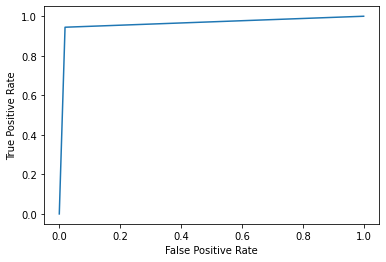

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

print("accuracy:", accuracy_score(y_test, y_predict))
print("precision:", precision_score(y_test, y_predict))
print("recall:", recall_score(y_test, y_predict))
print("f1:", f1_score(y_test, y_predict))
print("FPR:", fp / (fp+tn))

fpr, tpr, _ = roc_curve(y_test, y_predict, pos_label=SVM_classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()